In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\shadow net\data analysis\Raw Data\netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
df = df.drop_duplicates()

In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [6]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [7]:
type_counts = df['type'].value_counts()
type_counts


Movie      6126
TV Show    2664
Name: type, dtype: int64

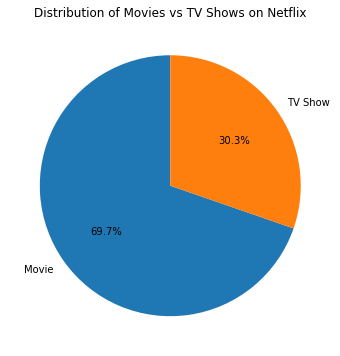

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.show()

In [9]:
country_counts = df['country'].value_counts()
country_counts

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [10]:
top_10_countries = country_counts.head(10)
top_10_countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

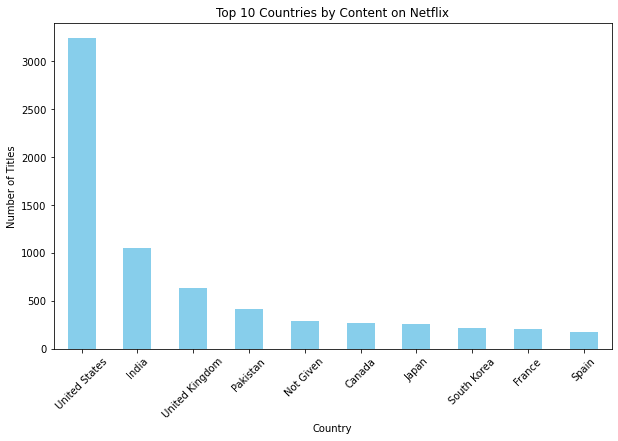

In [11]:
plt.figure(figsize=(10, 6))  
top_10_countries.plot(kind='bar', color='skyblue')

plt.title('Top 10 Countries by Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  
plt.show()

In [12]:
df['release_year'] = df['release_year'].astype(int)
release_year = df[df['release_year'] >= 2000]

In [13]:
type_year_counts = release_year.groupby(['release_year', 'type']).size().unstack()
type_year_counts

type,Movie,TV Show
release_year,,
2000,33,4
2001,40,5
2002,44,7
2003,51,8
2004,55,9
2005,67,13
2006,82,14
2007,74,14
2008,113,22


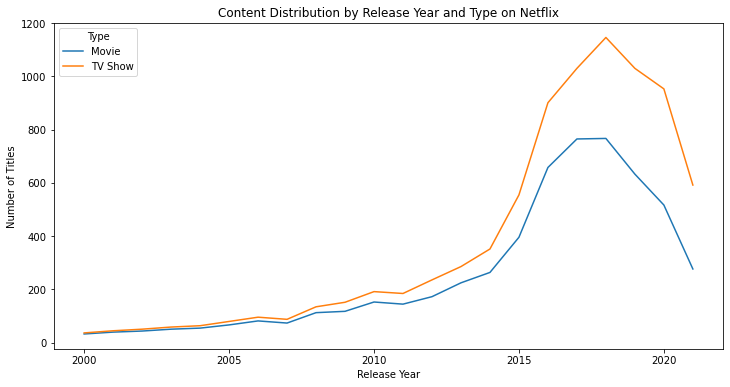

In [14]:
type_year_counts.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title('Content Distribution by Release Year and Type on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [16]:
#calculating the difference between year added and release year
df['time_to_add'] = df['year_added'] - df['release_year']

In [17]:
df2 = df[df['time_to_add'] >= 0]

In [18]:
# Summary statistics
time_to_add_summary = df2['time_to_add'].describe()
print(time_to_add_summary)


count    8776.000000
mean        4.699863
std         8.793843
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: time_to_add, dtype: float64


In [19]:
avg_time_to_add = df2.groupby('release_year')['time_to_add'].mean()

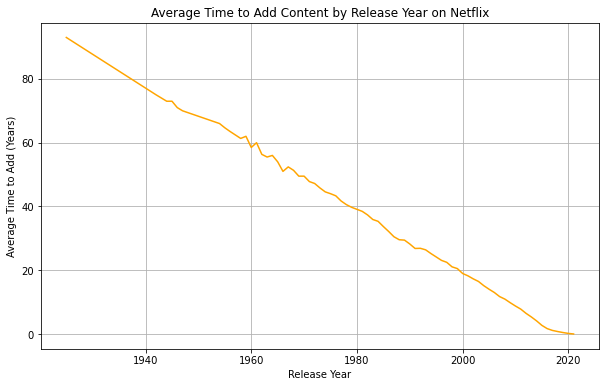

In [20]:
# Plotting the average time to add content by release year
plt.figure(figsize=(10, 6))
plt.plot(avg_time_to_add.index, avg_time_to_add.values, color='orange')

plt.title('Average Time to Add Content by Release Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Time to Add (Years)')
plt.grid(True)
plt.show()